<a name='1'></a>
# 1 - Packages and Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

<a name='2'></a>
# 2 - Load the CSV file into a DataFrame

In [3]:
data = pd.read_csv('CareerMapping1.csv')
data['Role'] = data['Role'].astype('category')

<a name='3'></a>
# 3 - Extracting Features and Target variables

In [4]:
X = data.drop('Role', axis=1)  # Features
y = data['Role'] 

<a name='4'></a>
# 4 - Train Validation and Test split
# Split the train and validation sets from the remaining data (50% train, 20% validation)

In [5]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2857, random_state=42)

<a name='5'></a>
# 5 - Calculating Test set on best validation set 

In [8]:
best_accuracy = 0
best_val_set = None

# Loop through different validation sets
for i in range(5):  # Assuming you want to try 5 different splits
    # Split the train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2857, random_state=i)  # Different random state for each split
    
    # Initialize the Naive Bayes classifier
    nb_classifier = GaussianNB()
    
    # Train the classifier on the training set
    nb_classifier.fit(X_train, y_train)
    
    # Predict labels on the validation set
    y_pred_val = nb_classifier.predict(X_val)
    
    # Calculate accuracy on the validation set
    accuracy_val = accuracy_score(y_val, y_pred_val)
    print(f"Validation {i+1} accuracy: {accuracy_val}")
    
    # Check if this validation set has the best accuracy so far
    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_val_set = (X_val, y_val)

# Now, best_val_set contains the features and labels of the validation set with the highest accuracy
# Use this validation set for final testing
X_val_best, y_val_best = best_val_set

# Train Naive Bayes model on the combined train and validation sets
X_train_final = pd.concat([X_train, X_val_best])
y_train_final = pd.concat([y_train, y_val_best])
nb_classifier_final = GaussianNB()
nb_classifier_final.fit(X_train_final, y_train_final)

# Predict labels on the test set
y_pred_test = nb_classifier_final.predict(X_test)
y_pred_train = nb_classifier_final.predict(X_train)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on test set using the best validation set: {accuracy_test}")
print(f"Accuracy on train set using the best validation set: {accuracy_train}")


Validation 1 accuracy: 0.49852652259332025
Validation 2 accuracy: 0.5304518664047151
Validation 3 accuracy: 0.5039292730844793
Validation 4 accuracy: 0.5162082514734774
Validation 5 accuracy: 0.5127701375245579
Accuracy on test set using the best validation set: 0.501637197118533
Accuracy on train set using the best validation set: 0.5112988799371193


<a name='6'></a>
# 6 - Calculating precision, recall, f1-score 

In [9]:
print(classification_report(y_test, y_pred_test))

                                 precision    recall  f1-score   support

               AI ML Specialist       0.37      0.92      0.53       337
                 API Specialist       0.93      0.89      0.91       168
   Application Support Engineer       0.48      0.05      0.09       204
               Business Analyst       0.76      0.07      0.13       182
     Customer Service Executive       0.78      0.93      0.84       176
      Cyber Security Specialist       0.31      0.76      0.44       178
         Database Administrator       0.80      0.18      0.29       199
              Graphics Designer       0.41      0.60      0.49       194
              Hardware Engineer       0.71      0.91      0.80       181
              Helpdesk Engineer       0.47      0.24      0.32       163
Information Security Specialist       0.46      0.38      0.42       190
            Networking Engineer       0.19      0.13      0.15       169
                Project Manager       0.75      0.

<a name='7'></a>
# 7 - Confusion matrix

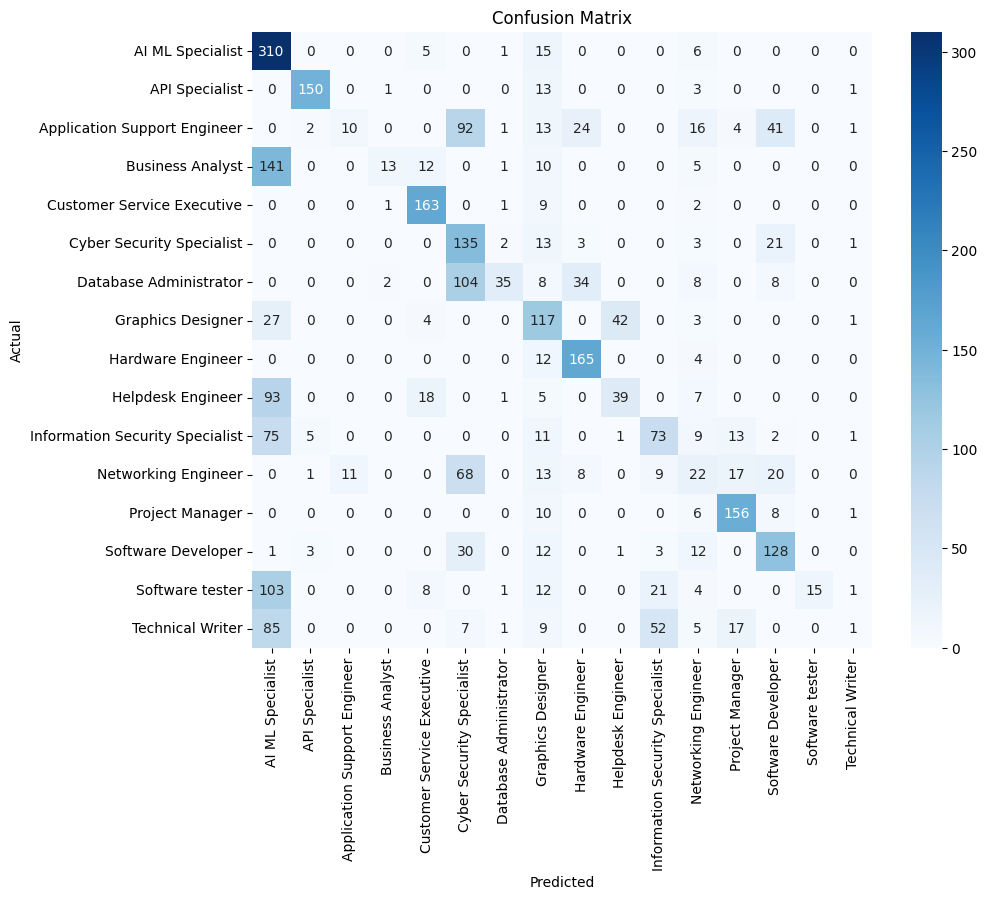

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
